**Vamos a ir contando los pasos del Proyecto**

Empezamos importando los modulos que nos haran falta, que solo van a ser tres: Pandas, Seaborn y Mayplotlib

In [ ]:
# Importamos los modulos que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Vamos a enfrentar las siguientes consolas, ¿en cada comparativa cual ha vendido mas videojuegos?**

*Consolas de sobremesa*:

PS1 vs N64

PS2 vs GC 

PS3 vs Wii

PS4 vs WiiU

*Consolas Portatiles*

PSP vs DS

PSV vs 3DS


**Aquí me fabrico mi propio DataFrame**

Voy a utilizar la fuente www.vgchartz.com ya que contiene bastantes datos y es usada de referencia para diferentes analisis y periodismo.

In [ ]:
consolas = ['GB','GBC','GBA','SNES','NES','NS','GC','N64','Wii','WiiU','3DS','DS','PSP','PSV', 'PS', 'PS2','PS3','PS4','PS5']
generos = ['Role-Playing', 'Action', 'Adventure', 'Action-Adventure', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

# Conseguimos los datos en un bucle doble primero buscamos por cada plataforma y generos

lista_de_dataframes = []

for consola in consolas:
    for genero in generos:
        # Este metodo de web scraping lo encontré por youtube y me ha resultado muy útil extraia exactamente lo que quería
        url = f'https://www.vgchartz.com/games/games.php?name=&keyword=&console={consola}&region=All&developer=&publisher=&goty_year=&genre={genero}&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=200&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0&showvgchartzscore=0&shownasales=0&shownasales=1&showdeveloper=0&showcriticscore=0&showpalsales=0&showpalsales=1&showreleasedate=0&showreleasedate=1&showuserscore=0&showjapansales=0&showjapansales=1&showlastupdate=0&showothersales=0&showothersales=1&showshipped=0'
        # Creo la variable df_temporal para que el bucle me funcione como deseo
        df_temporal = pd.read_html(url)[-2]
        # La tabla me salia en un formato que no me gustaba y con esto me quedo solo con los titulos de la columnas
        df_temporal.columns = df_temporal.columns.get_level_values(2)
        
        df_temporal['Genero'] = genero
        df_temporal['Plataforma'] = consola
        
        lista_de_dataframes.append(df_temporal)

df_final = pd.concat(lista_de_dataframes, ignore_index=True)

In [ ]:
df_final.to_csv('datos_videojuegos_definitivo.csv', index=False) #Guardo el DataFrame como CSV para no tener que volver a realizar el Web Scraping

NameError: name 'df_final' is not defined

In [2]:
df_cargado = pd.read_csv('datos_videojuegos_definitivo.csv') # Cargo el DataFrame y veo que hay mucha informacion que no quiero tener
df_cargado


,Pos,Game,Game.1,Console,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Unnamed: 10_level_2,Genero,Plataforma
0,1,NaN,Pokémon Red / Green / Blue Version,NaN,31.37m,11.27m,8.89m,10.22m,1.00m,30th Sep 98,NaN,Role-Playing,GB
1,2,NaN,Pokémon Gold / Silver Version,NaN,23.10m,9.00m,6.18m,7.20m,0.71m,14th Oct 00,NaN,Role-Playing,GB
2,3,NaN,Pokémon Yellow: Special Pikachu Edition,NaN,14.64m,5.89m,5.04m,3.12m,0.59m,19th Oct 99,NaN,Role-Playing,GB
3,4,NaN,Dragon Quest Monsters,NaN,2.35m,NaN,NaN,2.34m,0.01m,31st Dec 99,NaN,Role-Playing,GB
4,5,NaN,Yu-Gi-Oh: Duel Monsters 4,NaN,2.18m,NaN,NaN,2.17m,0.01m,07th Dec 00,NaN,Role-Playing,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22887,22,NaN,The Land Beneath Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5
22888,23,NaN,War Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5
22889,24,NaN,"Warhammer 40,000: Chaos Gate – Daemonhunters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5
22890,25,NaN,Warhammer Age of Sigmar: Realms of Ruin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5


**Para tener mas informacion cargo un DataFrame con los datos de ventas de las consolas a analizar**

In [3]:
df_consolas = pd.read_csv('venta_consolas.csv', sep='\t', encoding='latin-1')
df_consolas.set_index('Plataforma')

,América del norte,Europa,Japón,Resto del mundo,Global
Plataforma,,,,,
PS2,53.65,55.28,23.18,"27,9",160.01
DS,"57,92",51.84,"32,99",11.28,154.02
NS,52.78,"38,79","35,79",23.16,150.52
GB,43.18,40.05,32.47,"2,99",118.69
PS4,38.12,45.86,9.68,23.53,117.20
PS,40.78,31.09,21.59,9.04,102.49
Wii,45.51,33.12,12.77,10.23,101.63
PS3,29.60,30.87,10.47,16.47,87.40
PSP,21.62,25.31,20.02,15.57,82.52


**Procedo a la Modificación y limpieza DataFrame del principal**

In [4]:
#seleciono las columnas que deseo trabajar con ellas y les cambio los nombres
df_cargado=df_cargado[['Game.1','Total Sales','NA Sales','PAL Sales','Japan Sales','Other Sales','Release Date','Genero','Plataforma']]
nuevos_nombres = [
    'Nombre',
    'Ventas Totales',
    'Ventas Norte América',
    'Ventas Europa',
    'Ventas Japón',
    'Ventas Otros',
    'Fecha Salida',
    'Genero',
    'Plataforma'
]
df_cargado.columns = nuevos_nombres

In [5]:
# Voy a darle formato numerico a las columnas para poder trabajar con ellas
columnas_ventas = [
    'Ventas Totales',
    'Ventas Norte América',
    'Ventas Europa',
    'Ventas Japón',
    'Ventas Otros'
]
df_cargado[columnas_ventas] = df_cargado[columnas_ventas].apply(lambda x: x.str.replace('m', ''))
df_cargado[columnas_ventas] = df_cargado[columnas_ventas].apply(pd.to_numeric, errors='coerce')

C:\Users\eduar\AppData\Local\Temp\ipykernel_10740\2481201072.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cargado[columnas_ventas] = df_cargado[columnas_ventas].apply(lambda x: x.str.replace('m', ''))
C:\Users\eduar\AppData\Local\Temp\ipykernel_10740\2481201072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cargado[columnas_ventas] = df_cargado[columnas_ventas].apply(pd.to_numeric, errors='coerce')


In [6]:
# elimino todos los Nan porque no quiero trabajar con filas que no esten completas.
df=df_cargado.copy()
df.dropna(axis=0,how="any",inplace=True)
df = df.reset_index(drop=True)
df.set_index('Nombre',inplace=True)


In [7]:
# Le cambio el formato a la columna fecha de salida para trabajar con uno que estoy mas acostumbrado
df['Fecha Salida'] = pd.to_datetime(df['Fecha Salida'], dayfirst=True, errors='coerce').dt.strftime('%d/%m/%Y')
df

C:\Users\eduar\AppData\Local\Temp\ipykernel_10740\2938601493.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha Salida'] = pd.to_datetime(df['Fecha Salida'], dayfirst=True, errors='coerce').dt.strftime('%d/%m/%Y')


,Ventas Totales,Ventas Norte América,Ventas Europa,Ventas Japón,Ventas Otros,Fecha Salida,Genero,Plataforma
Nombre,,,,,,,,
Pokémon Red / Green / Blue Version,31.37,11.27,8.89,10.22,1.00,30/09/1998,Role-Playing,GB
Pokémon Gold / Silver Version,23.10,9.00,6.18,7.20,0.71,14/10/2000,Role-Playing,GB
Pokémon Yellow: Special Pikachu Edition,14.64,5.89,5.04,3.12,0.59,19/10/1999,Role-Playing,GB
Harry Potter and the Sorcerer's Stone,1.73,0.94,0.62,0.10,0.07,21/11/2001,Action,GB
The Legend of Zelda: Link's Awakening,3.83,2.21,0.96,0.54,0.13,01/08/1993,Adventure,GB
...,...,...,...,...,...,...,...,...
Pro Evolution Soccer 2018,0.75,0.12,0.36,0.19,0.09,12/09/2017,Sports,PS4
Pro Evolution Soccer 2017,0.75,0.08,0.41,0.18,0.09,13/09/2016,Sports,PS4
Everybody's Golf,0.56,0.12,0.22,0.17,0.06,29/08/2017,Sports,PS4


In [8]:
# Voy a añadir una nueva columna para poder agrupar por compañia para ello voy a crear una funcion sencilla.

plataformas_nintendo = ['GB','GBC','GBA','SNES','NES','NS','GC','N64','Wii','WiiU','3DS','DS']
plataformas_sony = ['PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'PSV']


def asignar_marca(plataforma):
    if plataforma in plataformas_nintendo:
        return 'Nintendo'
    elif plataforma in plataformas_sony:
        return 'Sony'

df['Marca'] = df['Plataforma'].apply(asignar_marca)

**Comienzo a realizar el analisis y las gráficas**

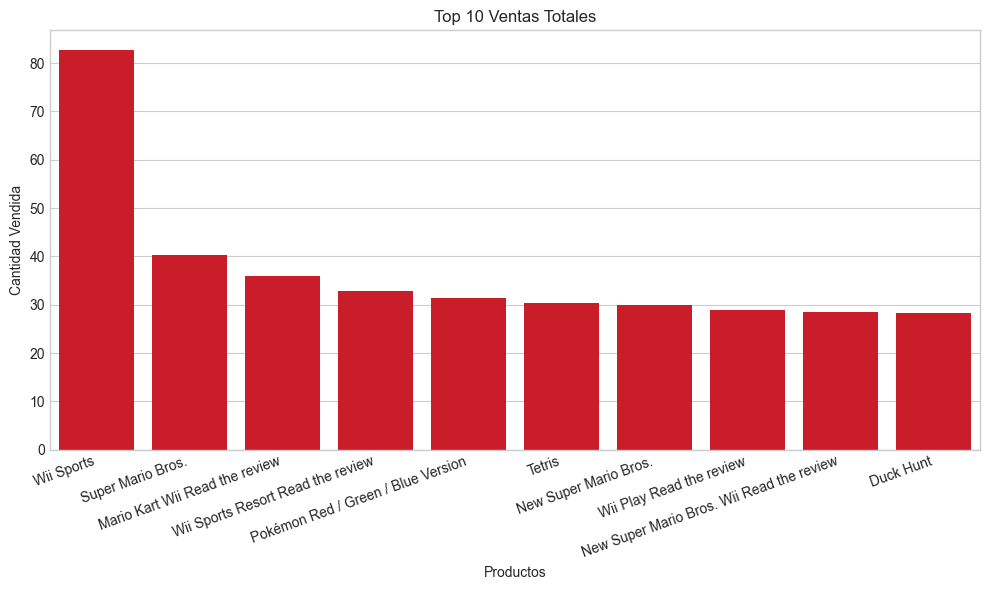

In [ ]:
# ¿Cuál es el Top 10 de los videojuegos más vendidos de la historia en este dataset?
ventas_totales=df['Ventas Totales'].sort_values(ascending=False).head(10).to_frame()
ventas_totales
plt.figure(figsize=(10, 6)) 

sns.barplot(x=ventas_totales.index, y=ventas_totales['Ventas Totales'],color='#E60012')
plt.title('Top 10 Ventas Totales')
plt.ylabel('Cantidad Vendida')
plt.xlabel('Productos')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\ventasgeneral.png')
# Mostrar el gráfico
plt.show();
# Podemos observar que los juegos que aparecen son exclusivos de Nintendo no hay ningun juego multiplataforma

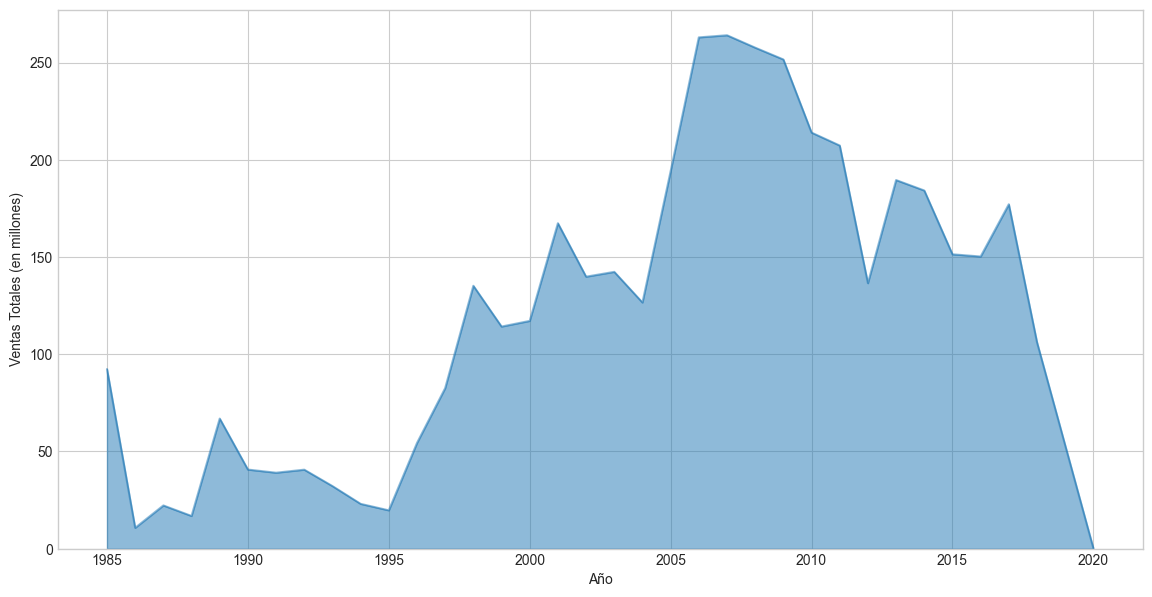

In [ ]:
# Sacamos los gráficos de la evolucion temporal en las ventas
df['Año'] = df['Fecha Salida'].dt.year

ventas_por_año = df.groupby('Año')['Ventas Totales'].sum()# Agrupamos por año y sumamos

plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(14, 7))

ventas_por_año.plot(
    kind='area',
    ax=ax,
    alpha=
    xlabel='Año',
    ylabel='Ventas Totales (en millones)'
)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\ventasaños.png')

plt.show();

<Figure size 1200x1200 with 0 Axes>

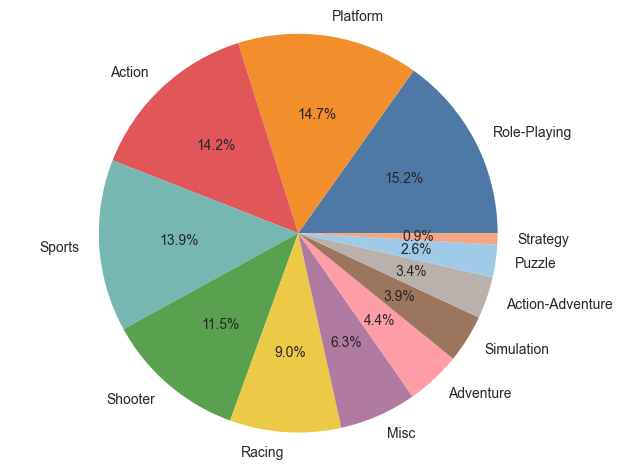

In [38]:
#¿Qué género ha generado más ventas totales sumando todas las consolas?
generos_mas_vendidos = df.groupby('Genero')['Ventas Totales'].sum().sort_values(ascending=False).to_frame()

colores_profesionales_12 = [
    '#4E79A7', '#F28E2C', '#E15759', '#76B7B2', '#59A14F', '#EDC948',
    '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC', '#A0CBE8', '#F4A582'
]

plt.figure(figsize=(12, 12))

generos_mas_vendidos.plot(
    kind='pie',
    y='Ventas Totales',
    autopct='%1.1f%%',
    colors=colores_profesionales_12,
    legend=False,
)

plt.ylabel('')
plt.axis('equal')

plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\tarta.png')
plt.tight_layout()
plt.show();

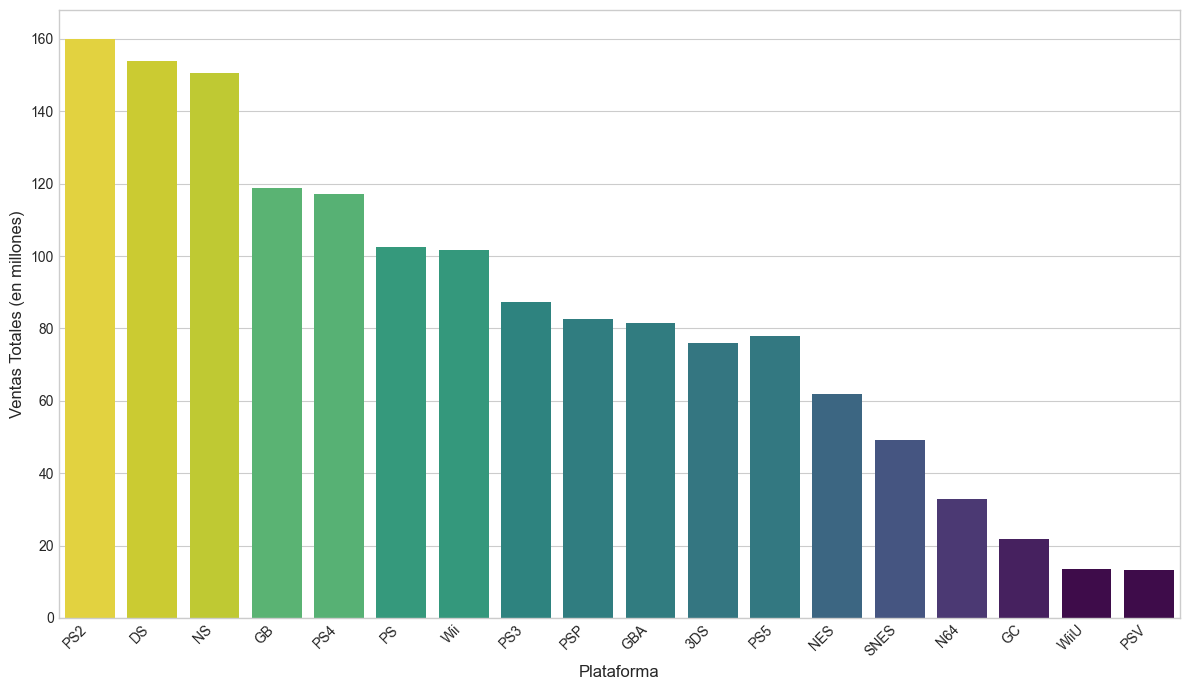

In [ ]:
#¿Cuál es la consola con mayores ventas de juegos totales acumuladas?
df_consolas['Global'].sort_values(ascending=False).to_frame()
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))


sns.barplot(
    legend=False,
    x=df_consolas['Plataforma'], 
    y=df_consolas['Global'],
    palette='viridis',
    hue=df_consolas['Global']
)



plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\ventaconsolas.png')
plt.show();

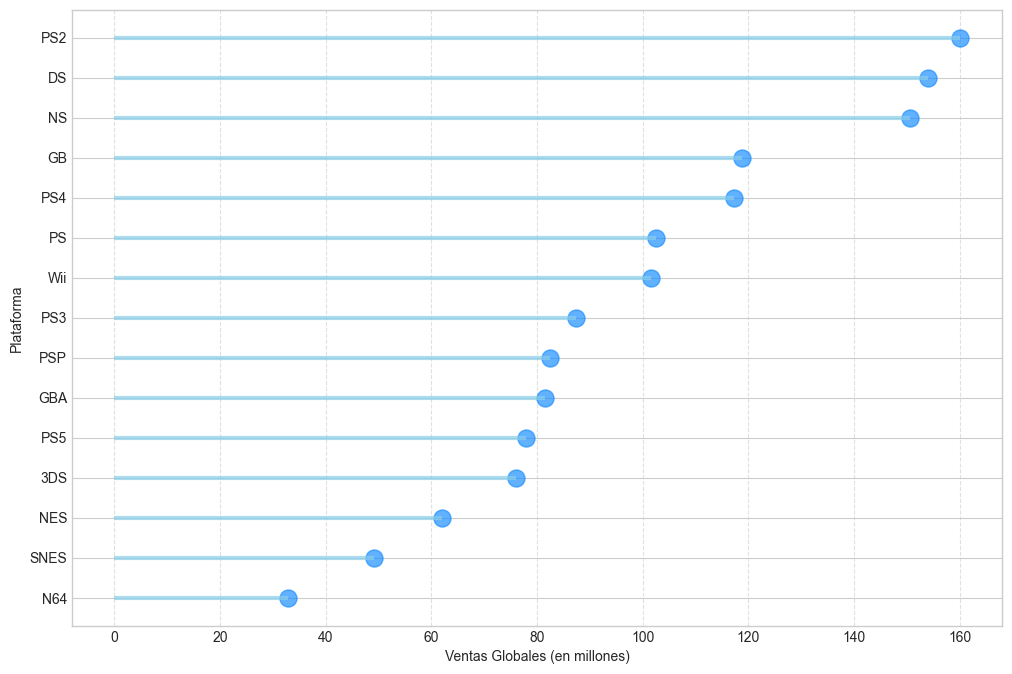

In [ ]:
#Utilizaré este grafico en la presentacion para dar variedad de estilos
ventas_por_plataforma = df_consolas.groupby('Plataforma')['Global'].sum().reset_index()
df_sorted = ventas_por_plataforma.sort_values('Global', ascending=True).tail(15) # Mostramos el top 15

plt.figure(figsize=(12, 8))

plt.hlines(
    y=df_sorted['Plataforma'],
    xmin=0,
    xmax=df_sorted['Global'],
    color='skyblue',
    alpha=0.7,
    linewidth=3
)
plt.scatter(
    df_sorted['Global'],
    df_sorted['Plataforma'],
    color='dodgerblue',
    alpha=0.7,
    s=150
)

plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Plataforma')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\ventaconsolaslollipop.png')
plt.show()

**Comienzo los enfrentamientos directos**

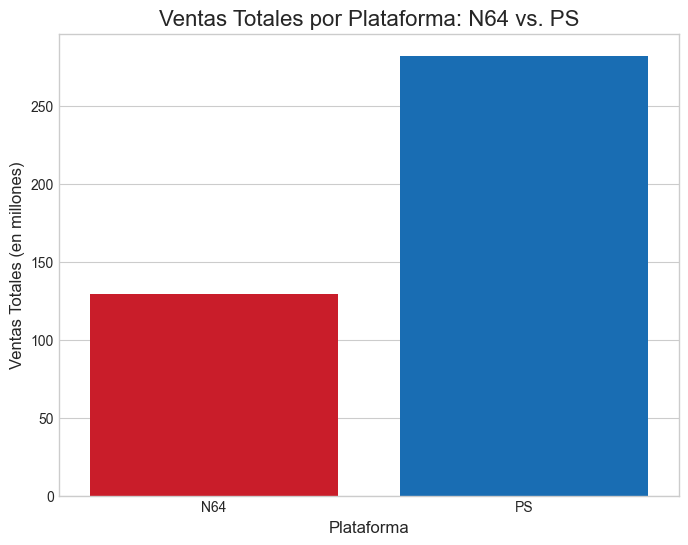

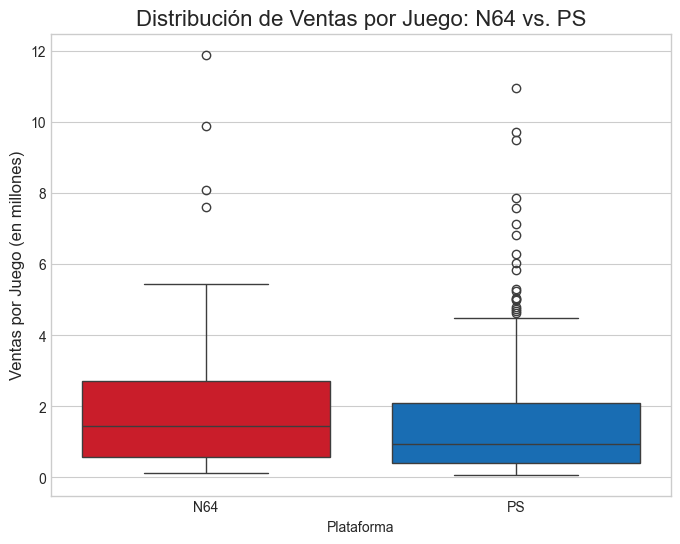

In [ ]:
#N64 vs PS1
plataformas_a_comparar = ['N64', 'PS']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS': '#0070CC',
    'N64': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: N64 vs. PS', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\n64ps1.png')
plt.show()

plataformas_a_comparar = ['N64', 'PS']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS': '#0070CC', 'N64': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: N64 vs. PS', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\boxn64ps1.png')
plt.show()

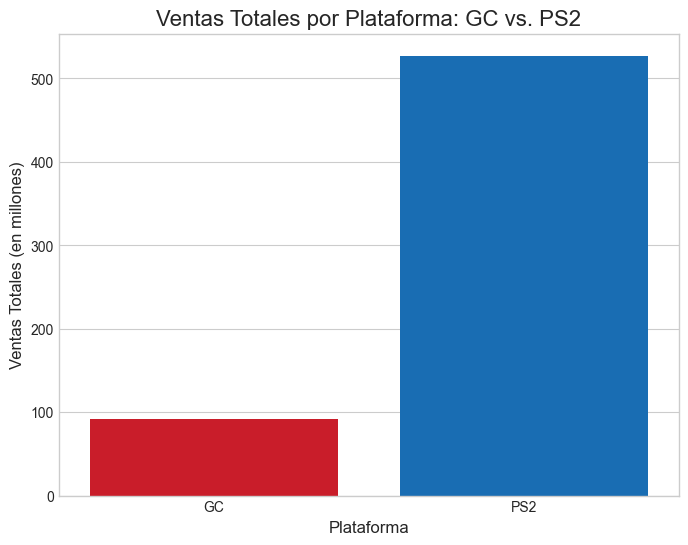

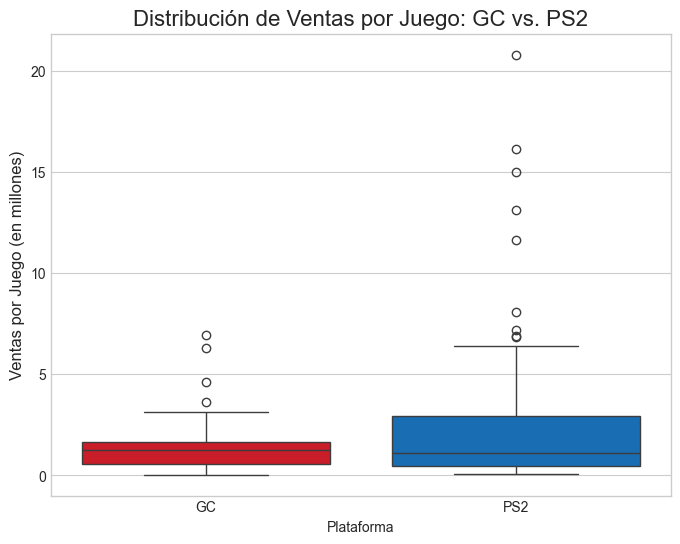

In [ ]:
#GC vs PS2
plataformas_a_comparar = ['GC', 'PS2']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS2': '#0070CC',
    'GC': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: GC vs. PS2', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\gcps2.png')
plt.show()

plataformas_a_comparar = ['GC', 'PS2']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS2': '#0070CC', 'GC': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: GC vs. PS2', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\boxgcps2.png')
plt.show()

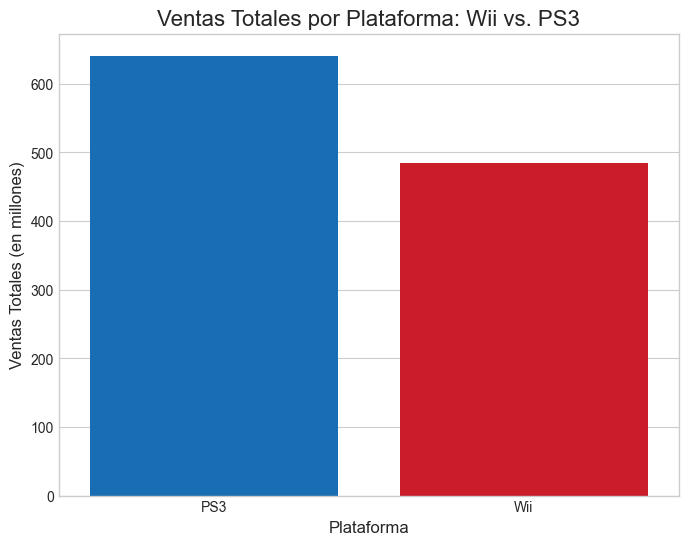

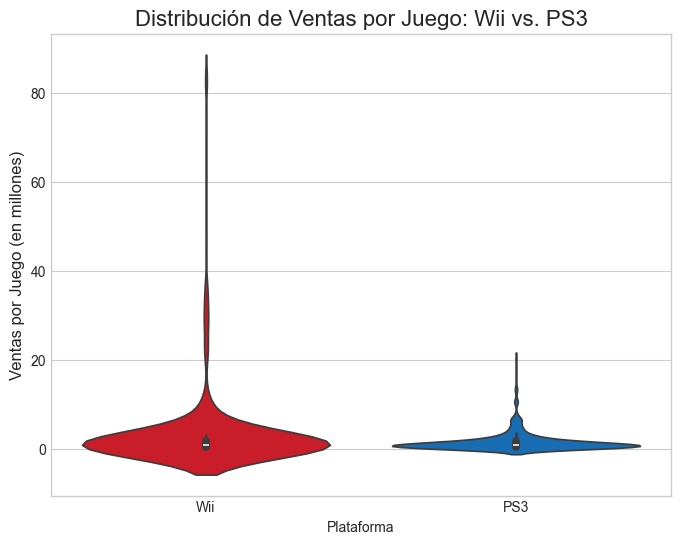

In [ ]:
#Wii vs PS3
plataformas_a_comparar = ['Wii', 'PS3']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS3': '#0070CC',
    'Wii': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: Wii vs. PS3', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\wiips3.png')
plt.show()
# Aquí tengo que usar el grafico de violin ya que wii tiene un gran outlier y del otro modo no se ve bien
plataformas_a_comparar = ['Wii', 'PS3']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS3': '#0070CC', 'Wii': '#E60012'}
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: Wii vs. PS3', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\violinWiiPs3.png')
plt.show()


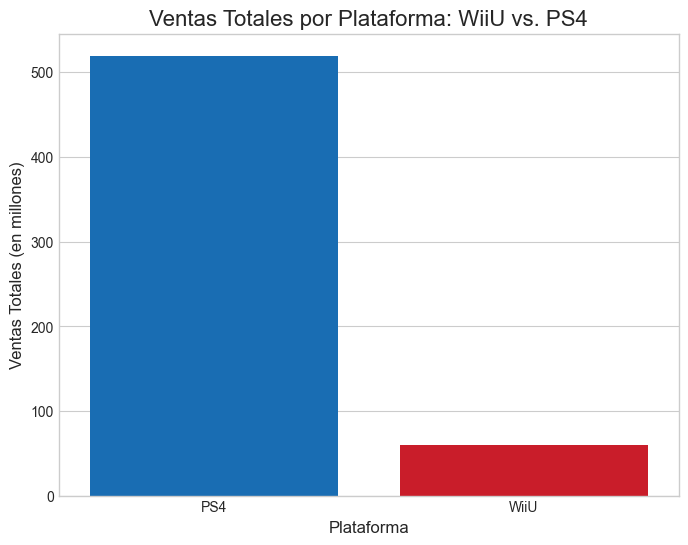

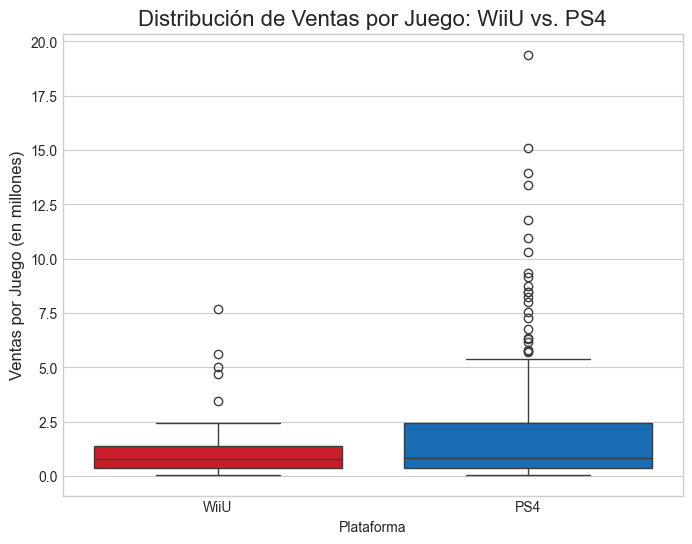

In [ ]:
#WiiU vs PS4
plataformas_a_comparar = ['WiiU', 'PS4']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS4': '#0070CC',
    'WiiU': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: WiiU vs. PS4', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\WiiUps4.png')
plt.show()

plataformas_a_comparar = ['WiiU', 'PS4']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS4': '#0070CC', 'WiiU': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: WiiU vs. PS4', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\boxWiiUps4.png')
plt.show()

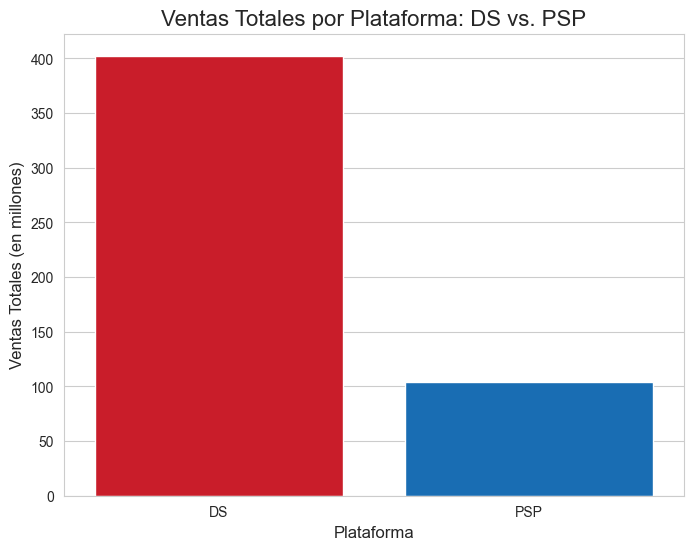

In [ ]:
#DS vs PSP
plataformas_a_comparar = ['DS', 'PSP']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PSP': '#0070CC',
    'DS': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: DS vs. PSP', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\DSPSP.png')
plt.show()

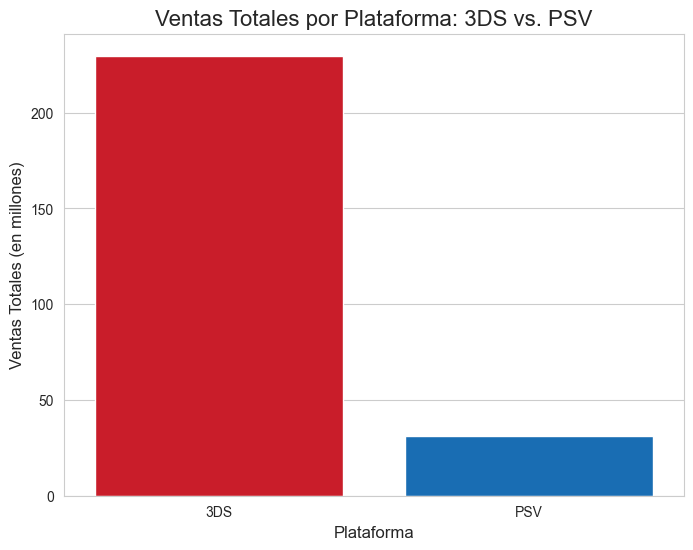

In [ ]:
#3DS vs PSV
plataformas_a_comparar = ['3DS', 'PSV']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PSV': '#0070CC',
    '3DS': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: 3DS vs. PSV', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\3DSPSV.png')
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_10740\2028879254.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha Salida'] = pd.to_datetime(df['Fecha Salida'], errors='coerce')


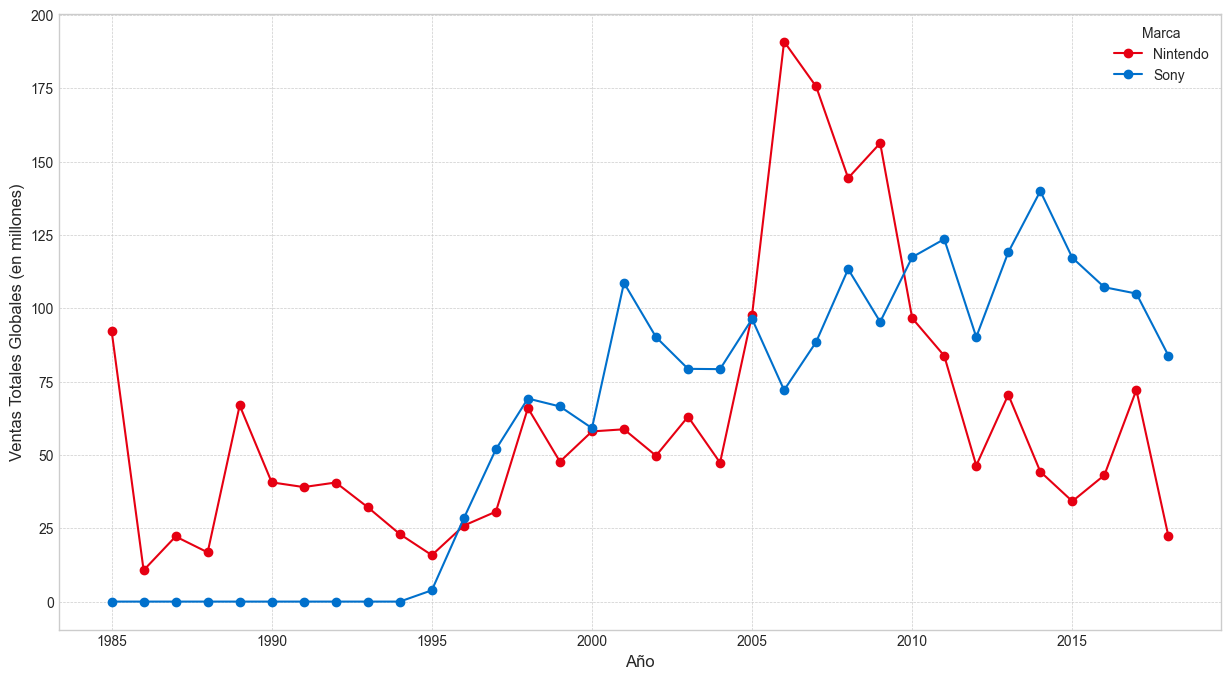

In [ ]:
#Un gráfico lineal con las ventas en el tiempo
df['Fecha Salida'] = pd.to_datetime(df['Fecha Salida'], errors='coerce')
df['Año'] = df['Fecha Salida'].dt.year
ventas_anuales = df.groupby(['Año', 'Marca'])['Ventas Totales'].sum().unstack().fillna(0)
ventas_hasta_2019 = ventas_anuales[ventas_anuales.index <= 2019].copy()
marcas_a_graficar = ['Nintendo', 'Sony']
ventas_anuales_filtradas = ventas_hasta_2019[marcas_a_graficar]
ventas_anuales_filtradas.plot(
    kind='line',
    figsize=(15, 8),
    marker='o',
    color={'Sony': '#0070CC', 'Nintendo': '#E60012'}
)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Totales Globales (en millones)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Marca')
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\Graficolineal.png')
plt.show()

**Aquí dejo algunas de las ideas descartadas**

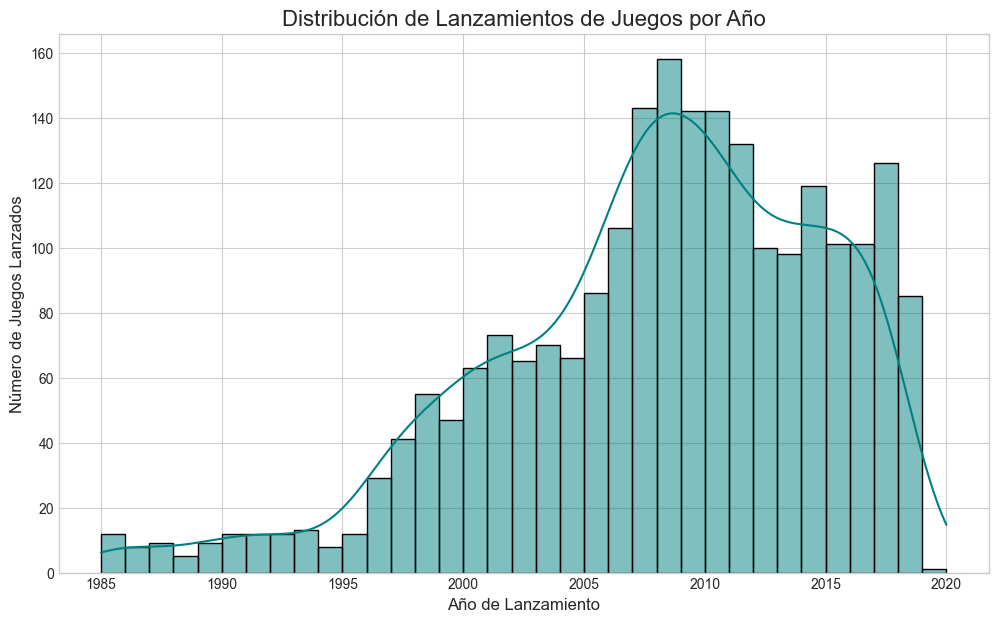

In [ ]:
#Histograma de Años de Lanzamiento

df['Año'] = pd.to_datetime(df['Fecha Salida'], errors='coerce').dt.year

plt.figure(figsize=(12, 7))


sns.histplot(
    data=df,
    x='Año',
    kde=True,       
    binwidth=1,      
    color='teal'
)


plt.title('Distribución de Lanzamientos de Juegos por Año', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Juegos Lanzados', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\histograma.png')
plt.show()

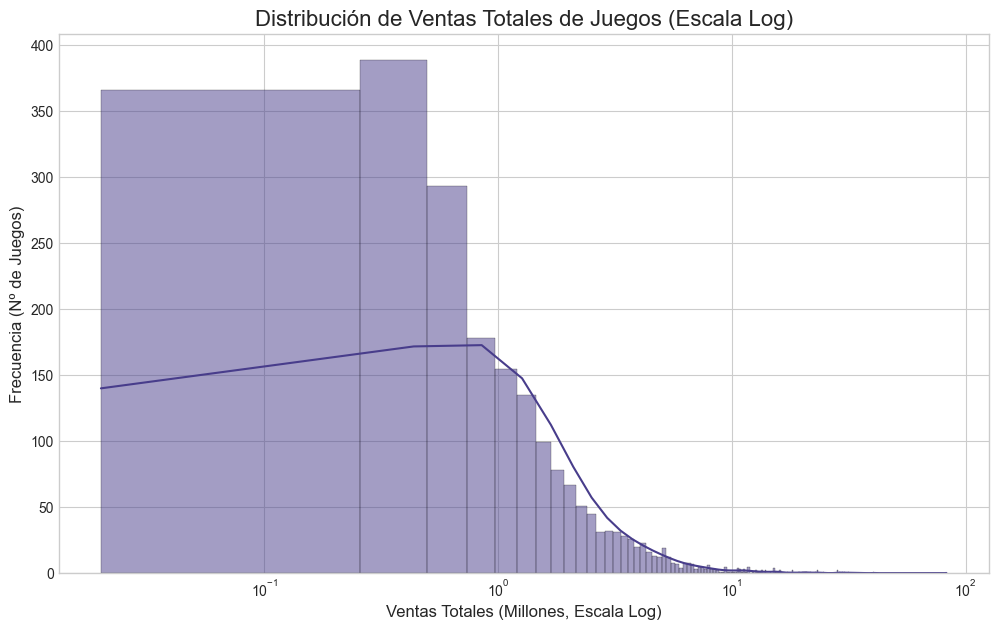

In [48]:
# Histograma de las ventas totales
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='Ventas Totales', kde=True, color='darkslateblue')

plt.xscale('log')

plt.title('Distribución de Ventas Totales de Juegos (Escala Log)', fontsize=16)
plt.xlabel('Ventas Totales (Millones, Escala Log)', fontsize=12)
plt.ylabel('Frecuencia (Nº de Juegos)', fontsize=12)
plt.savefig(r'C:\Users\eduar\Desktop\EDA\Graficos\histograma2.png')

plt.show()

In [55]:
from scipy.stats import mannwhitneyu
ventas_sony = df[df['Marca'] == 'Sony']['Ventas Totales'].dropna()
ventas_nintendo = df[df['Marca'] == 'Nintendo']['Ventas Totales'].dropna()

#Ejecutamos la prueba U de Mann-Whitney

stat, p_value = mannwhitneyu(ventas_sony, ventas_nintendo, alternative='two-sided')

#Mostramos los resultados de forma clara
print(f"Prueba U de Mann-Whitney para Ventas Totales")
print(f"Estadístico U: {stat:.2f}")
print(f"P-valor: {p_value}")

#Interpretamos el p-valor automáticamente
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: El p-valor es menor que 0.05. Rechazamos la hipótesis nula.")
    print(">> Existe una diferencia estadísticamente significativa entre las ventas de Sony y Nintendo.")
else:
    print("\nConclusión: El p-valor es mayor o igual a 0.05. No podemos rechazar la hipótesis nula.")
    print(">> No hay suficiente evidencia para afirmar que existe una diferencia significativa en las ventas.")

Prueba U de Mann-Whitney para Ventas Totales
Estadístico U: 592153.00
P-valor: 0.043577464714617445

Conclusión: El p-valor es menor que 0.05. Rechazamos la hipótesis nula.
>> Existe una diferencia estadísticamente significativa entre las ventas de Sony y Nintendo.
